In [ ]:
import numpy as np

"""
Dataset: Sun, J. (2016, August). Daily News for Stock Market Prediction, Version 1. Retrieved [2024.08.07.] from 
https://www.kaggle.com/aaron7sun/stocknews.

There are two channels of data in the provided dataset:
The news data was crawled from the Reddit worldnews channel. It has a total of 73608 news headlines from 2008-06-08 
to 2016-07-01. They are ranked by reddit user votes, and only the top 25 headlines are included for a single date.

The stock data was crawled from Yahoo Finance. It includes the Dow Jones Industrial Average (DJIA) from 2008-08-08 to
2016-07-01.

In this project I will use NLP techniques to analyze the sentiment of the news headlines and try to predict the
direction of the DJIA index based on the sentiment of the news headlines.
"""

In [1]:
# Importing the libraries
import pandas as pd
import re

ModuleNotFoundError: No module named 'nltk'

In [47]:
# importing the dataset
news = pd.read_csv('RedditNews.csv')
stock = pd.read_csv('upload_DJIA_table.csv')

In [4]:
news.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [17]:
# Data processing
news['Date'] = pd.to_datetime(news['Date'])

# for each date we will put all headlines into a single list
news_bydate = news.groupby('Date').agg({'News': ' '.join}).reset_index()
news_bydate

,Date,News
0,2008-06-08,b'Nim Chimpsky: The tragedy of the chimp who t...
1,2008-06-09,"b'United States quits Human Rights Council' b""..."
2,2008-06-10,"b'Oil shortage a myth, says industry insider' ..."
3,2008-06-11,b'BBC uncovers lost Iraq billions' b'War Crimi...
4,2008-06-12,"b'Did US attack Pakistan last night? ""Pakistan..."
...,...,...
2938,2016-06-27,Barclays and RBS shares suspended from trading...
2939,2016-06-28,"2,500 Scientists To Australia: If You Want To ..."
2940,2016-06-29,Explosion At Airport In Istanbul Yemeni former...
2941,2016-06-30,Jamaica proposes marijuana dispensers for tour...


In [37]:
# strip headlines from the followings: b'headline', b"headline", "b'headline'", b""headline"", "b""headline""" and 
# from any backslashes
news_bydate['News'] = news_bydate['News'].apply(lambda x: re.sub(r"b[\'\"]", "", x))
news_bydate['News'] = news_bydate['News'].apply(lambda x: re.sub(r"[\'\"]", "", x))
news_bydate['News'] = news_bydate['News'].apply(lambda x: re.sub(r"\\", "", x))
news_bydate

,Date,News,Sentiment,Compoud,Positive,Negative,Neutral,Subjectivity,Polarity
0,2008-06-08,Nim Chimpsky: The tragedy of the chimp who tho...,-0.9975,-0.9975,0.057,0.275,0.667,0.355753,-0.050594
1,2008-06-09,United States quits Human Rights Council Penta...,-0.9896,-0.9896,0.125,0.237,0.638,0.379322,0.018238
2,2008-06-10,"Oil shortage a myth, says industry insider Isr...",-0.9959,-0.9959,0.051,0.297,0.652,0.311643,-0.098525
3,2008-06-11,BBC uncovers lost Iraq billions War Criminal G...,-0.9928,-0.9928,0.131,0.291,0.578,0.484375,-0.093229
4,2008-06-12,Did US attack Pakistan last night? Pakistan fu...,-0.9850,-0.9850,0.114,0.234,0.652,0.380054,0.043094
...,...,...,...,...,...,...,...,...,...
2938,2016-06-27,Barclays and RBS shares suspended from trading...,-0.9839,-0.9839,0.117,0.219,0.664,0.352311,-0.014015
2939,2016-06-28,"2,500 Scientists To Australia: If You Want To ...",-0.9424,-0.9424,0.143,0.172,0.685,0.352649,0.046560
2940,2016-06-29,Explosion At Airport In Istanbul Yemeni former...,-0.9943,-0.9943,0.123,0.260,0.617,0.389617,0.052622
2941,2016-06-30,Jamaica proposes marijuana dispensers for tour...,-0.9982,-0.9982,0.087,0.297,0.616,0.382566,0.011243


In [48]:
# For stock data add a column that shows the direction of the stock market from yesterday to today
stock['Date'] = pd.to_datetime(stock['Date'])
for i in stock.index:
    if i == 0:
        stock.loc[i, 'Direction'] = 0
    else:
        if stock.loc[i, 'Adj Close'] > stock.loc[i-1, 'Adj Close']:
            stock.loc[i, 'Direction'] = 1
        else:
            stock.loc[i, 'Direction'] = 0

stock

,Date,Open,High,Low,Close,Volume,Adj Close,Direction
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,0.0
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,0.0
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,0.0
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,0.0
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,0.0
...,...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.0
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0.0
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,1.0
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1.0


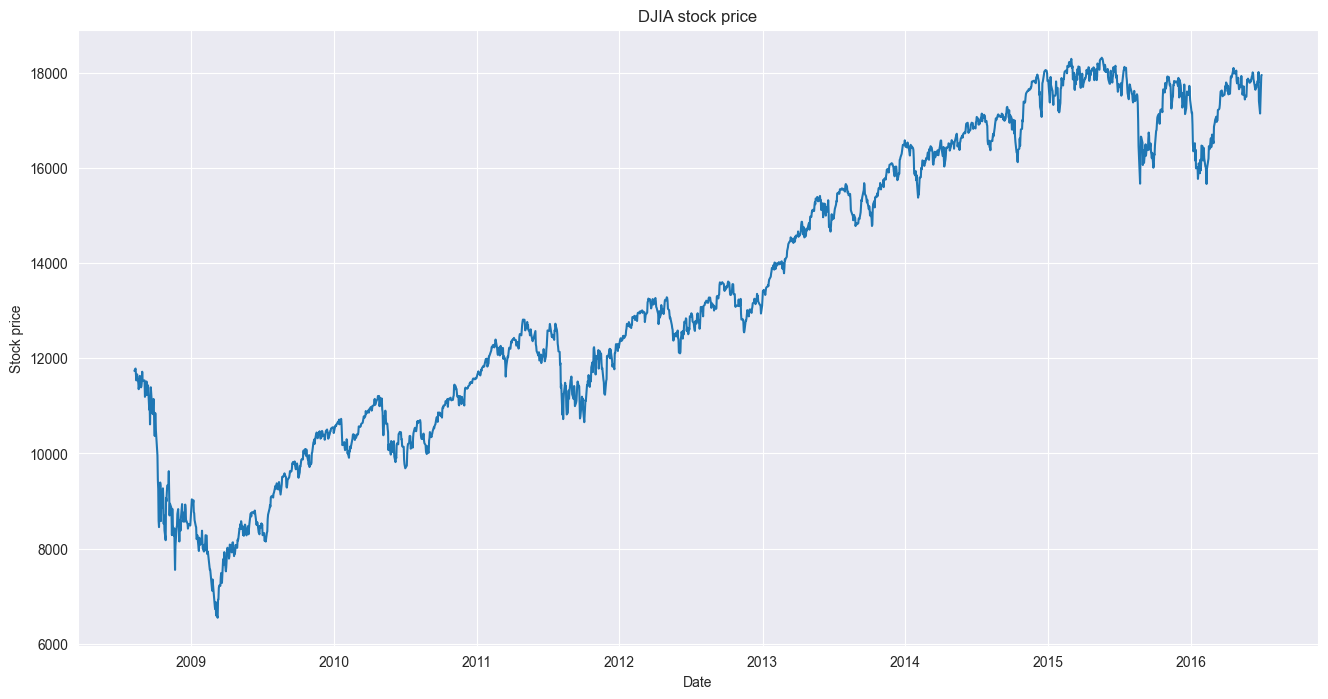

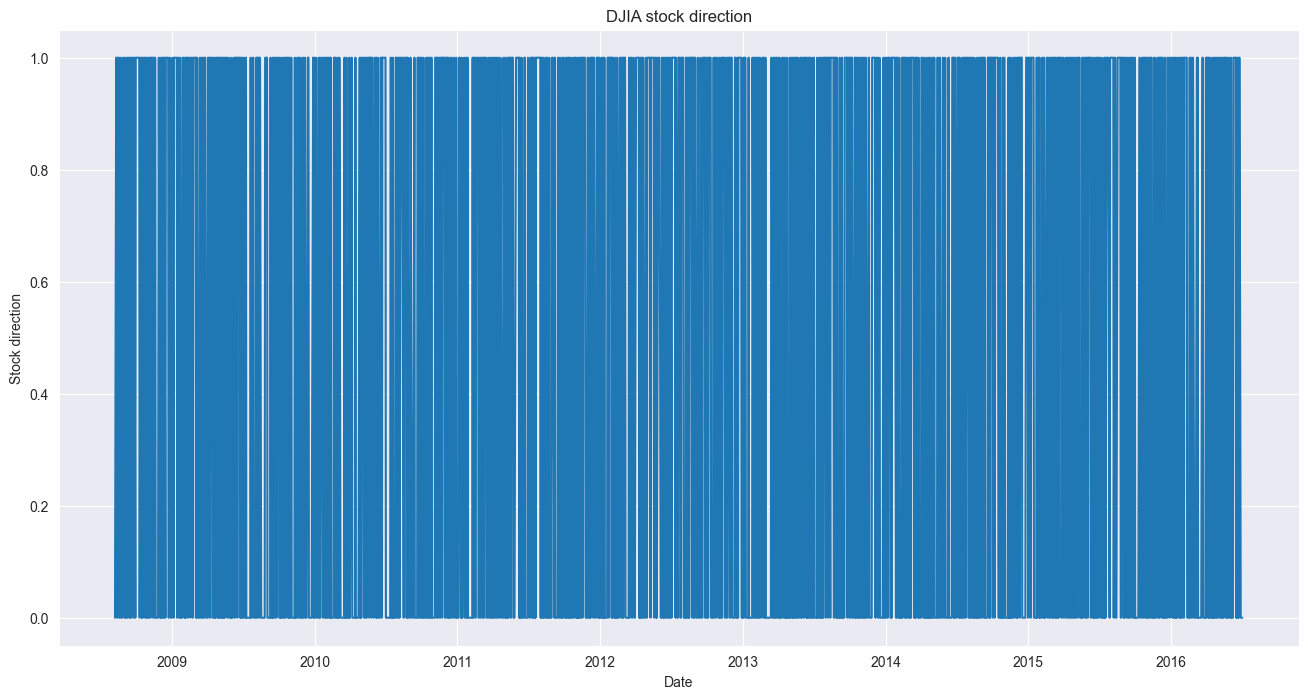

0.0    1068
1.0     921
Name: Direction, dtype: int64

In [64]:
# VIsualizing the stock data
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.plot(stock['Date'], stock['Adj Close'])
plt.title('DJIA stock price')
plt.xlabel('Date')
plt.ylabel('Stock price')
plt.show()

plt.figure(figsize=(16, 8))
plt.plot(stock['Date'], stock['Direction'])
plt.title('DJIA stock direction')
plt.xlabel('Date')
plt.ylabel('Stock direction')
plt.show()

stock['Direction'].value_counts()

In [28]:
# Lets do sentiment analysis on the news headlines
import nltk

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to C:\Users\Pinter
[nltk_data]     Andrea\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Pinter
[nltk_data]     Andrea\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Pinter
[nltk_data]     Andrea\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Pinter
[nltk_data]     Andrea\AppData\Roaming\nltk_data...


In [32]:
# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get the sentiment of a sentence
def get_sentiment(sentence):
    return sid.polarity_scores(sentence)

# Function to clean the text
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    text = word_tokenize(text)
    text = [word for word in text if word not in stopwords.words('english')]
    text = [WordNetLemmatizer().lemmatize(word) for word in text]
    text = ' '.join(text)
    return text

# Function to get the sentiment of a text
def get_text_sentiment(text):
    text = clean_text(text)
    return get_sentiment(text)

In [38]:
# Get the sentiment of each headline
sentiments = news_bydate['News'].apply(get_text_sentiment)

news_bydate['Compoud'] = sentiments.apply(lambda x: x['compound'])
news_bydate['Positive'] = sentiments.apply(lambda x: x['pos'])
news_bydate['Negative'] = sentiments.apply(lambda x: x['neg'])
news_bydate['Neutral'] = sentiments.apply(lambda x: x['neu'])
news_bydate

,Date,News,Sentiment,Compoud,Positive,Negative,Neutral,Subjectivity,Polarity
0,2008-06-08,Nim Chimpsky: The tragedy of the chimp who tho...,-0.9975,-0.9975,0.057,0.275,0.667,0.355753,-0.050594
1,2008-06-09,United States quits Human Rights Council Penta...,-0.9896,-0.9896,0.125,0.237,0.638,0.379322,0.018238
2,2008-06-10,"Oil shortage a myth, says industry insider Isr...",-0.9959,-0.9959,0.051,0.297,0.652,0.311643,-0.098525
3,2008-06-11,BBC uncovers lost Iraq billions War Criminal G...,-0.9928,-0.9928,0.131,0.291,0.578,0.484375,-0.093229
4,2008-06-12,Did US attack Pakistan last night? Pakistan fu...,-0.9850,-0.9850,0.114,0.234,0.652,0.380054,0.043094
...,...,...,...,...,...,...,...,...,...
2938,2016-06-27,Barclays and RBS shares suspended from trading...,-0.9839,-0.9839,0.117,0.219,0.664,0.352311,-0.014015
2939,2016-06-28,"2,500 Scientists To Australia: If You Want To ...",-0.9424,-0.9424,0.143,0.172,0.685,0.352649,0.046560
2940,2016-06-29,Explosion At Airport In Istanbul Yemeni former...,-0.9943,-0.9943,0.123,0.260,0.617,0.389617,0.052622
2941,2016-06-30,Jamaica proposes marijuana dispensers for tour...,-0.9982,-0.9982,0.087,0.297,0.616,0.382566,0.011243


In [35]:
from textblob import TextBlob

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [36]:
news_bydate['Subjectivity'] = news_bydate['News'].apply(get_subjectivity)
news_bydate['Polarity'] = news_bydate['News'].apply(get_polarity)

news_bydate

,Date,News,Sentiment,Compoud,Positive,Negative,Neutral,Subjectivity,Polarity
0,2008-06-08,Nim Chimpsky: The tragedy of the chimp who tho...,-0.9975,-0.9975,0.057,0.275,0.667,0.355753,-0.050594
1,2008-06-09,United States quits Human Rights Council Penta...,-0.9896,-0.9896,0.125,0.237,0.638,0.379322,0.018238
2,2008-06-10,"Oil shortage a myth, says industry insider Isr...",-0.9959,-0.9959,0.051,0.297,0.652,0.311643,-0.098525
3,2008-06-11,BBC uncovers lost Iraq billions War Criminal G...,-0.9928,-0.9928,0.131,0.291,0.578,0.484375,-0.093229
4,2008-06-12,Did US attack Pakistan last night? Pakistan fu...,-0.9850,-0.9850,0.114,0.234,0.652,0.380054,0.043094
...,...,...,...,...,...,...,...,...,...
2938,2016-06-27,Barclays and RBS shares suspended from trading...,-0.9839,-0.9839,0.117,0.219,0.664,0.352311,-0.014015
2939,2016-06-28,"2,500 Scientists To Australia: If You Want To ...",-0.9424,-0.9424,0.143,0.172,0.685,0.352649,0.046560
2940,2016-06-29,Explosion At Airport In Istanbul Yemeni former...,-0.9943,-0.9943,0.123,0.260,0.617,0.389617,0.052622
2941,2016-06-30,Jamaica proposes marijuana dispensers for tour...,-0.9982,-0.9982,0.087,0.297,0.616,0.382566,0.011243


In [45]:
# For every date in stock get the sentiment of period between today and 3 days
news_bydate['Date'] = pd.to_datetime(news_bydate['Date'])
stock['Date'] = pd.to_datetime(stock['Date'])
news_bydate = news_bydate.set_index('Date').sort_index()

news_bydate_filled = news_bydate.resample('D').ffill().reset_index()
news_bydate_filled

,Date,News,Sentiment,Compoud,Positive,Negative,Neutral,Subjectivity,Polarity
0,2008-06-08,Nim Chimpsky: The tragedy of the chimp who tho...,-0.9975,-0.9975,0.057,0.275,0.667,0.355753,-0.050594
1,2008-06-09,United States quits Human Rights Council Penta...,-0.9896,-0.9896,0.125,0.237,0.638,0.379322,0.018238
2,2008-06-10,"Oil shortage a myth, says industry insider Isr...",-0.9959,-0.9959,0.051,0.297,0.652,0.311643,-0.098525
3,2008-06-11,BBC uncovers lost Iraq billions War Criminal G...,-0.9928,-0.9928,0.131,0.291,0.578,0.484375,-0.093229
4,2008-06-12,Did US attack Pakistan last night? Pakistan fu...,-0.9850,-0.9850,0.114,0.234,0.652,0.380054,0.043094
...,...,...,...,...,...,...,...,...,...
2941,2016-06-27,Barclays and RBS shares suspended from trading...,-0.9839,-0.9839,0.117,0.219,0.664,0.352311,-0.014015
2942,2016-06-28,"2,500 Scientists To Australia: If You Want To ...",-0.9424,-0.9424,0.143,0.172,0.685,0.352649,0.046560
2943,2016-06-29,Explosion At Airport In Istanbul Yemeni former...,-0.9943,-0.9943,0.123,0.260,0.617,0.389617,0.052622
2944,2016-06-30,Jamaica proposes marijuana dispensers for tour...,-0.9982,-0.9982,0.087,0.297,0.616,0.382566,0.011243


In [52]:
# Merge the stock data with the news data
merged = pd.merge(stock, news_bydate_filled, on='Date', how='left')
merged

,Date,Open,High,Low,Close,Volume,Adj Close,Direction,News,Sentiment,Compoud,Positive,Negative,Neutral,Subjectivity,Polarity
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,0.0,A 117-year-old woman in Mexico City finally re...,-0.9987,-0.9987,0.068,0.302,0.631,0.320261,-0.035458
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,0.0,Jamaica proposes marijuana dispensers for tour...,-0.9982,-0.9982,0.087,0.297,0.616,0.382566,0.011243
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,0.0,Explosion At Airport In Istanbul Yemeni former...,-0.9943,-0.9943,0.123,0.260,0.617,0.389617,0.052622
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,0.0,"2,500 Scientists To Australia: If You Want To ...",-0.9424,-0.9424,0.143,0.172,0.685,0.352649,0.046560
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,0.0,Barclays and RBS shares suspended from trading...,-0.9839,-0.9839,0.117,0.219,0.664,0.352311,-0.014015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.0,All the experts admit that we should legalise ...,-0.9883,-0.9883,0.120,0.257,0.623,0.375099,0.040677
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0.0,U.S. refuses Israel weapons to attack Iran: r...,-0.9758,-0.9758,0.096,0.203,0.701,0.364021,0.011398
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,1.0,Remember that adorable 9-year-old who sang at ...,-0.9942,-0.9942,0.095,0.270,0.636,0.536234,-0.044302
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1.0,Why wont America and Nato help us? If they won...,-0.9895,-0.9895,0.106,0.292,0.602,0.374806,0.121956


In [53]:
# Create window of 3 days for each date
for sentiment in ['Compoud', 'Positive', 'Negative', 'Neutral', 'Subjectivity', 'Polarity']:
    for i in range(1, 3):
        merged[sentiment + f'_{i}'] = merged[sentiment].shift(-i)
        
merged

,Date,Open,High,Low,Close,Volume,Adj Close,Direction,News,Sentiment,...,Positive_1,Positive_2,Negative_1,Negative_2,Neutral_1,Neutral_2,Subjectivity_1,Subjectivity_2,Polarity_1,Polarity_2
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,0.0,A 117-year-old woman in Mexico City finally re...,-0.9987,...,0.087,0.123,0.297,0.260,0.616,0.617,0.382566,0.389617,0.011243,0.052622
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,0.0,Jamaica proposes marijuana dispensers for tour...,-0.9982,...,0.123,0.143,0.260,0.172,0.617,0.685,0.389617,0.352649,0.052622,0.046560
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,0.0,Explosion At Airport In Istanbul Yemeni former...,-0.9943,...,0.143,0.117,0.172,0.219,0.685,0.664,0.352649,0.352311,0.046560,-0.014015
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,0.0,"2,500 Scientists To Australia: If You Want To ...",-0.9424,...,0.117,0.114,0.219,0.130,0.664,0.756,0.352311,0.375510,-0.014015,0.037381
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,0.0,Barclays and RBS shares suspended from trading...,-0.9839,...,0.114,0.106,0.130,0.225,0.756,0.669,0.375510,0.343904,0.037381,0.086216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.0,All the experts admit that we should legalise ...,-0.9883,...,0.096,0.095,0.203,0.270,0.701,0.636,0.364021,0.536234,0.011398,-0.044302
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0.0,U.S. refuses Israel weapons to attack Iran: r...,-0.9758,...,0.095,0.106,0.270,0.292,0.636,0.602,0.536234,0.374806,-0.044302,0.121956
1986,2008-08-12,11781.700195,11782.349609,11601.519531,11642.469727,173590000,11642.469727,1.0,Remember that adorable 9-year-old who sang at ...,-0.9942,...,0.106,0.067,0.292,0.290,0.602,0.642,0.374806,0.267549,0.121956,-0.048568
1987,2008-08-11,11729.669922,11867.110352,11675.530273,11782.349609,183190000,11782.349609,1.0,Why wont America and Nato help us? If they won...,-0.9895,...,0.067,NaN,0.290,NaN,0.642,NaN,0.267549,NaN,-0.048568,NaN


In [56]:
merged.dropna(inplace=True)
merged

,Date,Open,High,Low,Close,Volume,Adj Close,Direction,News,Sentiment,...,Positive_1,Positive_2,Negative_1,Negative_2,Neutral_1,Neutral_2,Subjectivity_1,Subjectivity_2,Polarity_1,Polarity_2
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141,0.0,A 117-year-old woman in Mexico City finally re...,-0.9987,...,0.087,0.123,0.297,0.260,0.616,0.617,0.382566,0.389617,0.011243,0.052622
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234,0.0,Jamaica proposes marijuana dispensers for tour...,-0.9982,...,0.123,0.143,0.260,0.172,0.617,0.685,0.389617,0.352649,0.052622,0.046560
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688,0.0,Explosion At Airport In Istanbul Yemeni former...,-0.9943,...,0.143,0.117,0.172,0.219,0.685,0.664,0.352649,0.352311,0.046560,-0.014015
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703,0.0,"2,500 Scientists To Australia: If You Want To ...",-0.9424,...,0.117,0.114,0.219,0.130,0.664,0.756,0.352311,0.375510,-0.014015,0.037381
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234,0.0,Barclays and RBS shares suspended from trading...,-0.9839,...,0.114,0.106,0.130,0.225,0.756,0.669,0.375510,0.343904,0.037381,0.086216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,2008-08-18,11659.650391,11690.429688,11434.120117,11479.389648,156290000,11479.389648,1.0,"In an Afghan prison, the majority of female pr...",-0.9947,...,0.143,0.120,0.241,0.257,0.616,0.623,0.457692,0.375099,0.047756,0.040677
1983,2008-08-15,11611.209961,11709.889648,11599.730469,11659.900391,215040000,11659.900391,1.0,Mom of missing gay man: Too bad hes not a 21-y...,-0.9701,...,0.120,0.096,0.257,0.203,0.623,0.701,0.375099,0.364021,0.040677,0.011398
1984,2008-08-14,11532.070312,11718.280273,11450.889648,11615.929688,159790000,11615.929688,0.0,All the experts admit that we should legalise ...,-0.9883,...,0.096,0.095,0.203,0.270,0.701,0.636,0.364021,0.536234,0.011398,-0.044302
1985,2008-08-13,11632.809570,11633.780273,11453.339844,11532.959961,182550000,11532.959961,0.0,U.S. refuses Israel weapons to attack Iran: r...,-0.9758,...,0.095,0.106,0.270,0.292,0.636,0.602,0.536234,0.374806,-0.044302,0.121956


In [65]:
# Split the data into training and test set
# Based on the author of the dataset's recommendation, we will use the data from 2008-08-08 to 2014-12-31 as the training

train = merged[merged['Date'] < '2015-01-01']
test = merged[merged['Date'] >= '2015-01-01']

X_train = train[['Compoud', 'Positive', 'Negative', 'Neutral', 'Subjectivity', 'Polarity', 'Compoud_1', 'Positive_1', 'Negative_1', 'Neutral_1', 'Subjectivity_1', 'Polarity_1', 'Compoud_2', 'Positive_2', 'Negative_2', 'Neutral_2', 'Subjectivity_2', 'Polarity_2']]
y_train = train['Direction']

X_test = test[['Compoud', 'Positive', 'Negative', 'Neutral', 'Subjectivity', 'Polarity', 'Compoud_1', 'Positive_1', 'Negative_1', 'Neutral_1', 'Subjectivity_1', 'Polarity_1', 'Compoud_2', 'Positive_2', 'Negative_2', 'Neutral_2', 'Subjectivity_2', 'Polarity_2']]
y_test = test['Direction']

y_test.value_counts()

0.0    193
1.0    185
Name: Direction, dtype: int64

In [59]:
# Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

accuracy_score(y_test, y_pred)

0.4894179894179894

In [60]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[149,  44],
       [149,  36]], dtype=int64)

In [62]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=4)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

accuracy_score(y_test, y_pred)

0.5

In [63]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[177,  16],
       [173,  12]], dtype=int64)

In [66]:
# Multi-layer Perceptron
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 50), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy_score(y_test, y_pred)

0.5105820105820106

In [68]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[193,   0],
       [185,   0]], dtype=int64)

In [69]:
# XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=100, random_state=42, max_depth=4)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

accuracy_score(y_test, y_pred)

0.5264550264550265

In [70]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[115,  78],
       [101,  84]], dtype=int64)

In [71]:
# LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam

X_train = X_train.values
X_test = X_test.values

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=32)


Epoch 1/100
51/51 [==============================] - 5s 21ms/step - loss: 0.2813
Epoch 2/100
51/51 [==============================] - 1s 18ms/step - loss: 0.2558
Epoch 3/100
51/51 [==============================] - 1s 18ms/step - loss: 0.2526
Epoch 4/100
51/51 [==============================] - 1s 18ms/step - loss: 0.2529
Epoch 5/100
51/51 [==============================] - 1s 18ms/step - loss: 0.2532
Epoch 6/100
51/51 [==============================] - 1s 18ms/step - loss: 0.2549
Epoch 7/100
51/51 [==============================] - 1s 19ms/step - loss: 0.2516
Epoch 8/100
51/51 [==============================] - 1s 19ms/step - loss: 0.2506
Epoch 9/100
51/51 [==============================] - 1s 19ms/step - loss: 0.2516
Epoch 10/100
51/51 [==============================] - 1s 25ms/step - loss: 0.2500
Epoch 11/100
51/51 [==============================] - 1s 27ms/step - loss: 0.2533
Epoch 12/100
51/51 [==============================] - 1s 28ms/step - loss: 0.2523
Epoch 13/100
51/51 [=====

In [72]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

accuracy_score(y_test, y_pred)

12/12 [==============================] - 3s 9ms/step


0.5105820105820106

In [73]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[193,   0],
       [185,   0]], dtype=int64)

In [ ]:
# Conclusion
"""
In this project I used NLP techniques to analyze the sentiment of the news headlines and tried to predict the direction
of the DJIA index based on the sentiment of the news headlines. I used Linear Discriminant Analysis, Random Forest,
Multi-layer Perceptron, XGBoost and LSTM models to predict the direction of the DJIA index. The best accuracy was
achieved by the XGBoost model with an accuracy of 0.527. This low accuracy can be attributed to the fact that the
sentiment of the non-market specific headlines may not be a good indicator of the direction of the stock market.

Future work can include time series analysis of the stock market data and using the sentiment of the news headlines.

In another project I will use this dataset to build an algorithmic trader bot that uses the sentiment of the news 
headlines to make trading decisions.
"""